<a href="https://colab.research.google.com/github/FranklinAkogwu/portfolio/blob/main/FullSalesBasedonDemographics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time

# Set seaborn style for plots
sns.set(style="whitegrid")

# Expected output: No output, just imports


In [23]:
# Step 2: Upload and Load Dataset
from google.colab import files

print("Please upload your dataset CSV file:")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("First 5 rows of dataset:")
print(df.head())

# Expected output: Table showing dataset columns including 'ip.address', 'age', 'region', 'in.store', 'items', 'amount', etc.


Please upload your dataset CSV file:


Saving Demographic_Data_Orig.csv to Demographic_Data_Orig (2).csv
First 5 rows of dataset:
   index       full.name      ip.address  region  in.store  age  items  \
0      0   Carter Stokes             NaN       2         0   37      4   
1      1     Jacob Jerde             NaN       2         0   35      2   
2      2    Tressa Ratke  192.90.208.202       4         1   45      3   
3      3  Rudolf Abshire  251.55.128.164       3         1   46      3   
4      4   Theresa Davis  182.19.192.186       1         1   33      4   

    amount  
0   281.03  
1   219.51  
2  1525.70  
3   715.25  
4  1937.50  


In [24]:
# Step 3: Check Missing Values and Handle 'ip.address' Column

print("Missing values per column:")
print(df.isnull().sum())

# Fill missing IP addresses with placeholder '0.0.0.0' to keep column for geolocation
df['ip.address'] = df['ip.address'].fillna('0.0.0.0')

print(f"Missing IP addresses after fill: {df['ip.address'].isnull().sum()}")

# Expected output:
# Missing counts per column showing 'ip.address' missing values before fill
# Confirmation that missing IPs are now zero after fill


Missing values per column:
index             0
full.name         0
ip.address    40000
region            0
in.store          0
age               0
items             0
amount            0
dtype: int64
Missing IP addresses after fill: 0


In [25]:
# Step 4: Convert Relevant Columns to Categorical Types

df['region'] = df['region'].astype('category')
df['in.store'] = df['in.store'].astype('category')

print("Data types after conversion:")
print(df.dtypes)

# Expected output:
# 'region' and 'in.store' columns shown as 'category' dtype


Data types after conversion:
index            int64
full.name       object
ip.address      object
region        category
in.store      category
age              int64
items            int64
amount         float64
dtype: object


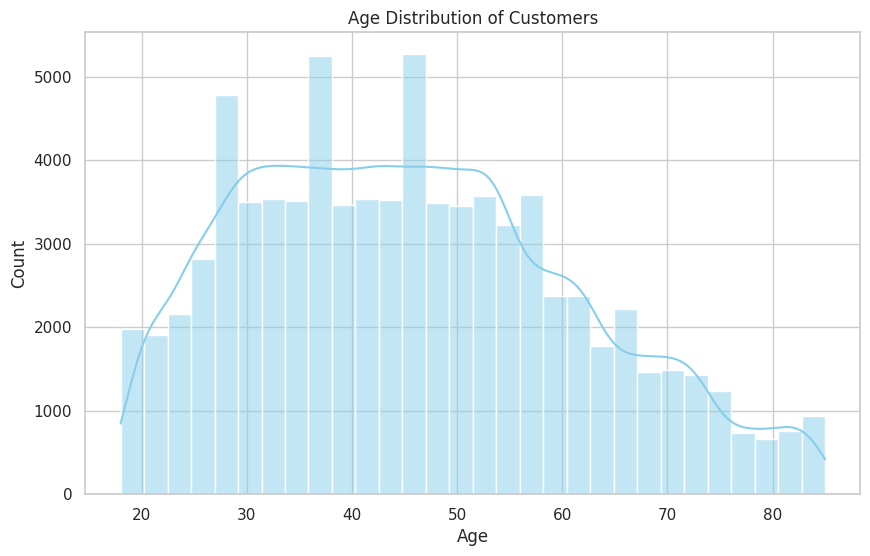

<ipython-input-26-c95b9c229aa6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='pastel')


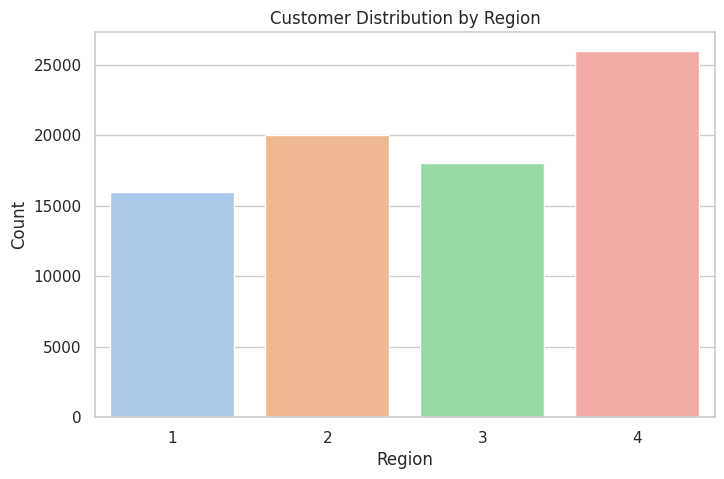

<ipython-input-26-c95b9c229aa6>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_region_spending = df.groupby(['age_group', 'region'])['amount'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

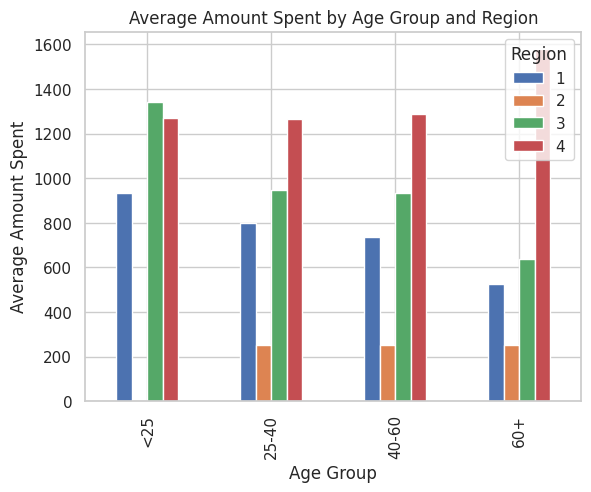

In [26]:
# Step 5: Analyze Customer Shopping Trends by Age and Region

# 5.1 Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Expected output: Histogram with KDE showing age spread

# 5.2 Customer Count by Region
plt.figure(figsize=(8,5))
sns.countplot(x='region', data=df, palette='pastel')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# Expected output: Bar chart showing customer counts per region

# 5.3 Average Amount Spent by Age Group and Region
# Create age bins
df['age_group'] = pd.cut(df['age'], bins=[0,25,40,60,100], labels=['<25','25-40','40-60','60+'])

# Group by age group and region, calculate mean amount spent
age_region_spending = df.groupby(['age_group', 'region'])['amount'].mean().unstack()

plt.figure(figsize=(12,6))
age_region_spending.plot(kind='bar', stacked=False)
plt.title('Average Amount Spent by Age Group and Region')
plt.xlabel('Age Group')
plt.ylabel('Average Amount Spent')
plt.legend(title='Region')
plt.show()

# Expected output: Grouped bar chart showing spending patterns by age group and region


<ipython-input-27-2de4b50aed22>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='in.store', data=df, palette='Set2')


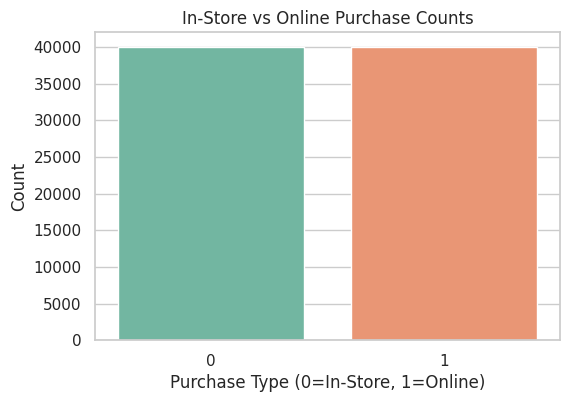

<ipython-input-27-2de4b50aed22>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='in.store', y='amount', data=df, palette='Set3')


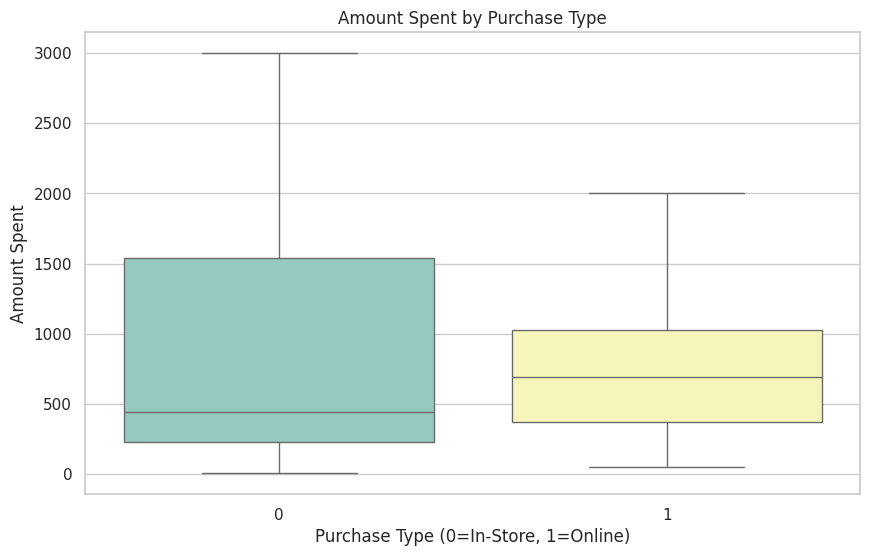

Correlation between purchase type and amount spent: -0.085


In [27]:
# Step 6: Analyze Spending Habits Based on Store vs Online Behavior

# 6.1 Count of Purchases by Purchase Type
plt.figure(figsize=(6,4))
sns.countplot(x='in.store', data=df, palette='Set2')
plt.title('In-Store vs Online Purchase Counts')
plt.xlabel('Purchase Type (0=In-Store, 1=Online)')
plt.ylabel('Count')
plt.show()

# Expected output: Bar chart showing counts of in-store and online purchases

# 6.2 Boxplot of Amount Spent by Purchase Type
plt.figure(figsize=(10,6))
sns.boxplot(x='in.store', y='amount', data=df, palette='Set3')
plt.title('Amount Spent by Purchase Type')
plt.xlabel('Purchase Type (0=In-Store, 1=Online)')
plt.ylabel('Amount Spent')
plt.show()

# Expected output: Boxplot showing spending distribution by purchase channel

# 6.3 Correlation between 'in.store' and 'amount'
# Convert 'in.store' to numeric if needed
df['in.store_num'] = df['in.store'].cat.codes if hasattr(df['in.store'], 'cat') else df['in.store']
correlation = df['in.store_num'].corr(df['amount'])
print(f"Correlation between purchase type and amount spent: {correlation:.3f}")

# Expected output: Numeric correlation value indicating relationship strength


In [31]:
# Step 7: Use IP Addresses to Track Geographical Trends

# Function to get geolocation info from ipapi.co API
def get_geolocation(ip):
    if ip == '0.0.0.0':
        return pd.Series([np.nan, np.nan, np.nan])  # No location for placeholder IP
    try:
        # Added a timeout to the request
        response = requests.get(f'https://ipapi.co/{ip}/json/', timeout=5)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        data = response.json()
        # Check if essential fields exist before returning
        country = data.get('country_name')
        region = data.get('region')
        city = data.get('city')
        if country and region and city: # Ensure all needed fields are present
             return pd.Series([country, region, city])
        else:
             print(f"Missing data for IP {ip}: {data}") # Print data if incomplete
             return pd.Series([np.nan, np.nan, np.nan])

    except requests.exceptions.RequestException as e:
        print(f"Request failed for IP {ip}: {e}") # Print request errors
        return pd.Series([np.nan, np.nan, np.nan])
    except Exception as e:
        print(f"An unexpected error occurred for IP {ip}: {e}") # Print other errors
        return pd.Series([np.nan, np.nan, np.nan])


# Due to API limits, sample unique IPs to geolocate
unique_ips = df['ip.address'].unique()
sample_ips = pd.Series(unique_ips).sample(100, random_state=42)  # Sample 100 IPs

print("Geolocating sample IP addresses...")

ip_location_map = {}
# Added a counter to limit API calls for testing if needed, currently disabled
# api_call_count = 0
for ip in sample_ips:
    # if api_call_count >= 10: # Example limit
    #     print("API call limit reached for testing.")
    #     break
    ip_location_map[ip] = get_geolocation(ip)
    time.sleep(1.5)  # Increased sleep slightly to be safer with API rate limits
    # api_call_count += 1 # Increment counter

ip_location_df = pd.DataFrame.from_dict(ip_location_map, orient='index', columns=['Country', 'Region', 'City'])
print("Sample geolocation results:")
print(ip_location_df.head())

# Check how many IPs returned location data
print(f"Number of IPs with location data: {ip_location_df.dropna().shape[0]}")

# Expected output: DataFrame with Country, Region, City for sampled IPs

# %%
# Step 8: Merge Geolocation Data Back to Main DataFrame

# Merge geolocation info for sampled IPs only
df_geo = df[df['ip.address'].isin(sample_ips)].copy()
df_geo = df_geo.merge(ip_location_df, left_on='ip.address', right_index=True, how='left')

print("Sample rows with geolocation info:")
print(df_geo[['ip.address', 'Country', 'Region', 'City', 'items', 'amount']].head())

# Check the size of the df_geo DataFrame after merge
print(f"Size of df_geo after merge: {df_geo.shape}")
# Check the number of rows with non-null Country after merge
print(f"Number of rows in df_geo with Country data: {df_geo['Country'].dropna().shape[0]}")

# Expected output: Sample data rows showing IP, location, items purchased, and amount spent

# %%
# Step 9: Analyze Geographical Trends in Purchases

# 9.1 Total Items Purchased by Country
# Filter out rows where 'Country' is NaN before grouping
items_by_country = df_geo.dropna(subset=['Country']).groupby('Country')['items'].sum().sort_values(ascending=False)

print(f"Number of countries with purchase data: {len(items_by_country)}")

# Check if items_by_country is empty before plotting
if not items_by_country.empty:
    plt.figure(figsize=(12,6))
    items_by_country.plot(kind='bar', color='skyblue')
    plt.title('Total Items Purchased by Country')
    plt.xlabel('Country')
    plt.ylabel('Total Items Purchased')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No country data available to plot total items purchased.")


# Expected output: Bar chart showing countries with highest total items purchased or a message if no data

# 9.2 Total Amount Spent by Region in Top Country
# Check if items_by_country is not empty before trying to find the top country
if not items_by_country.empty:
    top_country = items_by_country.index[0]
    # Filter df_geo for the top country and drop rows with missing Region
    region_spending = df_geo[(df_geo['Country'] == top_country) & (df_geo['Region'].notna())].groupby('Region')['amount'].sum().sort_values(ascending=False)

    print(f"Top Country: {top_country}")
    print(f"Number of regions in {top_country} with spending data: {len(region_spending)}")

    # Check if region_spending is empty before plotting
    if not region_spending.empty:
        plt.figure(figsize=(12,6))
        region_spending.plot(kind='bar', color='coral')
        plt.title(f'Total Amount Spent by Region in {top_country}')
        plt.xlabel('Region')
        plt.ylabel('Total Amount Spent')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"No region spending data available to plot for {top_country}.")
else:
    print("No country data available to determine the top country for region spending analysis.")


# Expected output: Bar chart showing spending distribution by region within the top country or a message if no data

Geolocating sample IP addresses...
Request failed for IP 241.247.219.96: 429 Client Error: Too Many Requests for url: https://ipapi.co/241.247.219.96/json/
Request failed for IP 180.191.250.152: 429 Client Error: Too Many Requests for url: https://ipapi.co/180.191.250.152/json/
Request failed for IP 154.131.108.38: 429 Client Error: Too Many Requests for url: https://ipapi.co/154.131.108.38/json/
Request failed for IP 232.227.121.252: 429 Client Error: Too Many Requests for url: https://ipapi.co/232.227.121.252/json/
Request failed for IP 96.239.68.36: 429 Client Error: Too Many Requests for url: https://ipapi.co/96.239.68.36/json/
Request failed for IP 23.84.98.136: 429 Client Error: Too Many Requests for url: https://ipapi.co/23.84.98.136/json/
Request failed for IP 241.214.86.150: 429 Client Error: Too Many Requests for url: https://ipapi.co/241.214.86.150/json/
Request failed for IP 236.139.20.22: 429 Client Error: Too Many Requests for url: https://ipapi.co/236.139.20.22/json/
Req

In [33]:
# Step 10: Summary Insights

print("Average amount spent by region:")
print(df.groupby('region')['amount'].mean().round(2))

print("\nAverage amount spent by purchase type:")
print(df.groupby('in.store')['amount'].mean().round(2))

print("\nTop countries by total items purchased (from geolocation):")
# Check if items_by_country is not empty before printing its head
if not items_by_country.empty:
    print(items_by_country.head())
else:
    print("No country data available for summary.")


# Check if top_country and region_spending were defined in Step 9
# We can check if items_by_country was not empty, which implies top_country was defined.
# We also need to ensure region_spending was calculated successfully (not empty).
if not items_by_country.empty and 'region_spending' in locals() and not region_spending.empty:
     print(f"\nTop regions in {top_country} by amount spent:")
     print(region_spending.head())
elif not items_by_country.empty and ('region_spending' not in locals() or region_spending.empty):
    print(f"\nNo region spending data available to summarize for {top_country}.")
else:
    # This case covers when items_by_country was empty
    print("\nNo country or region data available for summary.")

Average amount spent by region:
region
1     745.16
2     252.11
3     917.97
4    1284.05
Name: amount, dtype: float64

Average amount spent by purchase type:
in.store
0    897.57
1    774.27
Name: amount, dtype: float64

Top countries by total items purchased (from geolocation):
No country data available for summary.

No country or region data available for summary.


<ipython-input-33-ee5845b04573>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('region')['amount'].mean().round(2))
<ipython-input-33-ee5845b04573>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('in.store')['amount'].mean().round(2))
